# Support Vector Machine

Loosely based on [https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-svm.ipynb](https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-svm.ipynb)

## General Idea

Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Generate random data

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=17, cluster_std=0.60)

Divide data into train/test groups and train the SVC classifier

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Get division line parameters

In [4]:
W = clf.coef_[0]
I = clf.intercept_
m = -W[0] / W[1]
b = -I[0] / W[1]

Plot the data (train with bigger, and test with smaller points), division line and support vecotrs (big blue points)

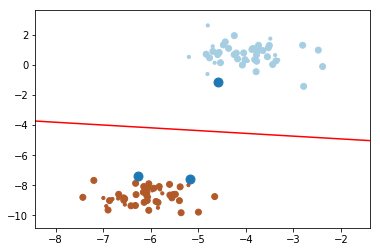

In [5]:
xplot = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired');
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, c=y_test, cmap='Paired')
plt.plot(xplot, m * xplot + b, '-r')
plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80);

Check the predictions on test data.

In [6]:
from sklearn.metrics import accuracy_score
100 * accuracy_score(y_test, clf.predict(X_test))

100.0

We can model circular data.

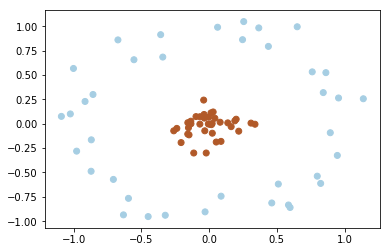

In [7]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(factor=0.1, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Paired");

Fitting circular data with linear kernel gives wrong results.

In [8]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
100 * accuracy_score(y_test, pred)

48.0

But switching kernel to `rbf` works as it should be

In [9]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
100 * accuracy_score(y_test, pred)

100.0

## Iris dataset

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
100 * accuracy_score(y_test, pred)


97.368421052631575